# Handwritten digits classification using neural network

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test,y_test)= keras.datasets.mnist.load_data()

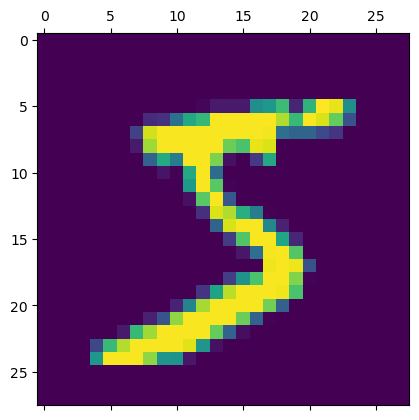

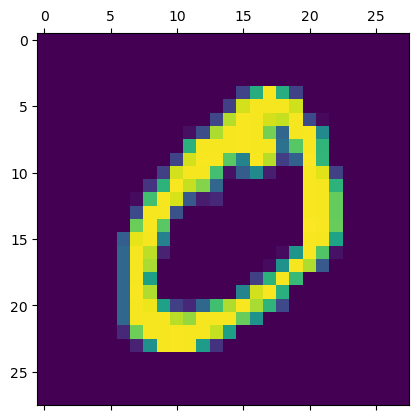

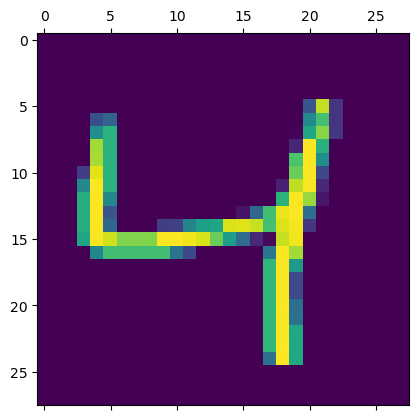

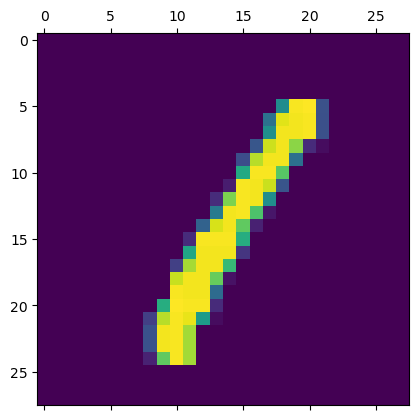

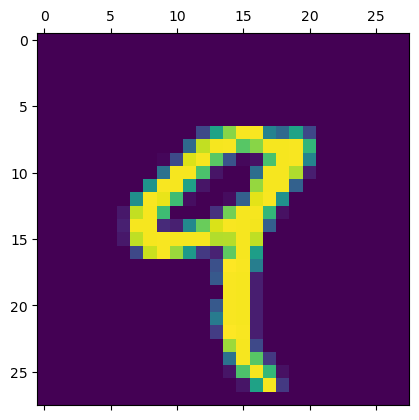

In [3]:
#plotting mnist data
for i in range(0,5):
    plt.matshow(X_train[i])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
#scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [9]:
#reshapping arrays
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4643 - accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2664 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

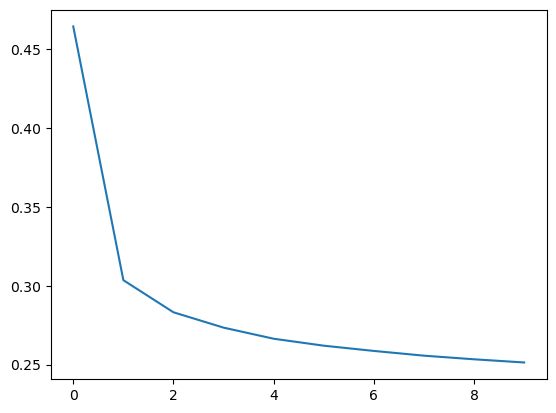

In [12]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [13]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2641 - accuracy: 0.9295


[0.26407837867736816, 0.9294999837875366]

In [14]:
#Predicitng on train and test data
train_predict = model.predict(X_train_flattened)
test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_predicted_labels = [np.argmax(i) for i in test_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [16]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1114,    5,    2,    0,    1,    3,    2,    8,    0],
       [   4,    6,  947,   12,   10,    4,   11,    8,   27,    3],
       [   4,    0,   21,  917,    2,   27,    2,    9,   20,    8],
       [   1,    1,    5,    2,  933,    0,    6,    4,    8,   22],
       [  10,    3,    3,   29,   12,  780,   12,    8,   30,    5],
       [  13,    3,   10,    1,    8,   12,  908,    1,    2,    0],
       [   1,    6,   25,    7,   10,    1,    0,  941,    2,   35],
       [   7,    8,    6,   20,    9,   22,    7,   10,  876,    9],
       [  11,    7,    1,    8,   38,    6,    0,   15,    7,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

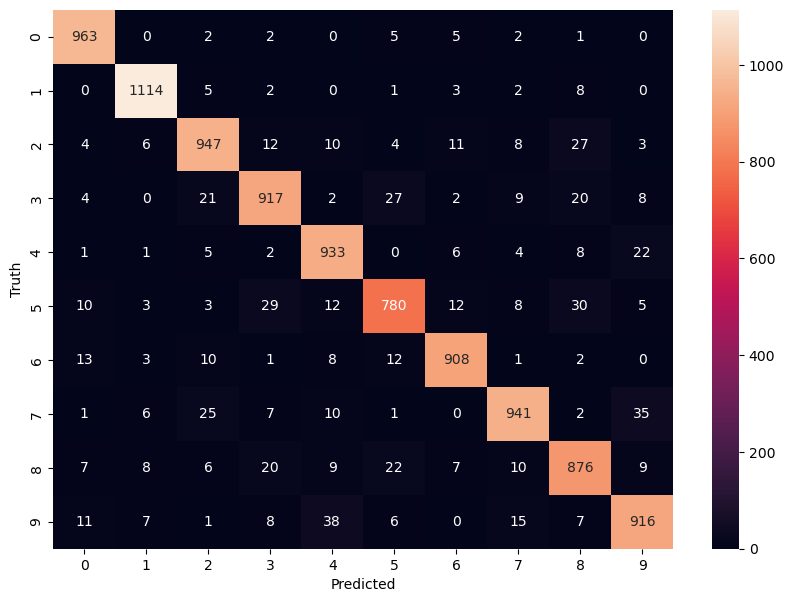

In [17]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Hidden layer to improve model performance

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2698 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1241 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0870 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

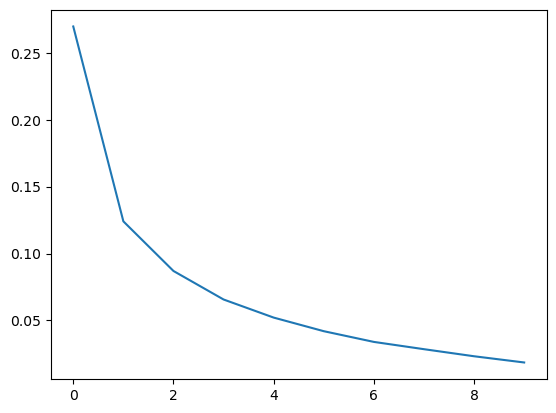

In [19]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [20]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9784


[0.07950307428836823, 0.9783999919891357]

In [21]:
#Predicitng on train and test data
train_predict = model.predict(X_train_flattened)
test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_predicted_labels = [np.argmax(i) for i in test_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [23]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    1,    0,    0,    3,    2,    1,    0],
       [   0, 1124,    4,    0,    0,    0,    3,    0,    4,    0],
       [   5,    1, 1003,    2,    2,    0,    2,    7,    9,    1],
       [   0,    0,    3,  990,    1,    2,    0,    1,    6,    7],
       [   3,    0,    2,    1,  954,    1,    7,    2,    1,   11],
       [   2,    1,    0,   11,    1,  867,    5,    0,    4,    1],
       [   3,    3,    1,    1,    7,    2,  941,    0,    0,    0],
       [   3,    6,    8,    3,    1,    0,    0,  993,    3,   11],
       [   3,    1,    3,    2,    4,    3,    1,    2,  950,    5],
       [   0,    2,    0,    4,    4,    2,    1,    3,    2,  991]])>

Text(95.72222222222221, 0.5, 'Truth')

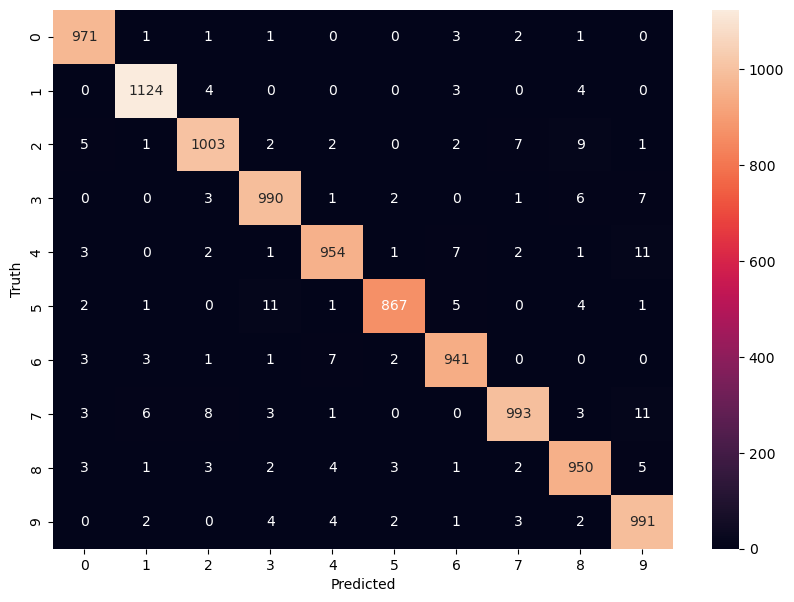

In [24]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')